In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#Upload de arquivo
df = pd.read_excel("AdventureWorks.xlsx")

In [3]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Conhecendo quantas linhas e colunas
df.shape

(904, 16)

In [6]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
#Qual foi a receita total?
df["Valor Venda"].sum()

5984606.1426

In [9]:
#Qual o custo total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando coluna nova
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [11]:
#Qual o custo total?
round(df["custo"].sum(),2)

2486783.05

In [13]:
#Qual o lucro de cada venda?
df["lucro"]= df["Valor Venda"] - df["custo"]

In [14]:
#Qual o lucro total?
round(df["lucro"].sum(),2)

3497823.09

In [16]:
#Total de dias para enviar cada produto
df["tempoEnvio"] = df["Data Envio"] - df["Data Venda"]
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempoEnvio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [18]:
#Média do tempo de envio para cada marca - preciso transformar data em numérico
df["tempoEnvio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.head(1)


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempoEnvio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [20]:
df["tempoEnvio"].dtype

dtype('int64')

In [25]:
df.groupby("Marca")["tempoEnvio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempoEnvio, dtype: float64

In [27]:
#Verificando se temos valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempoEnvio        0
dtype: int64

In [29]:
#Lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [31]:
pd.options.display.float_format = '{:20,.2f}'.format #Mudando formato de apresentação dos números
#Lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [32]:
#Resetando o index (traz no formato colunar)
lucroAno = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucroAno

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [33]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

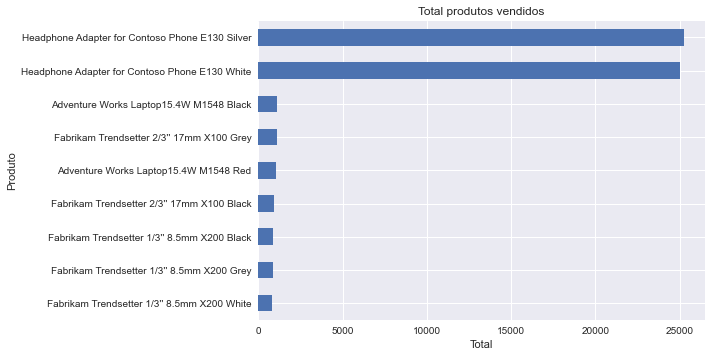

In [34]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

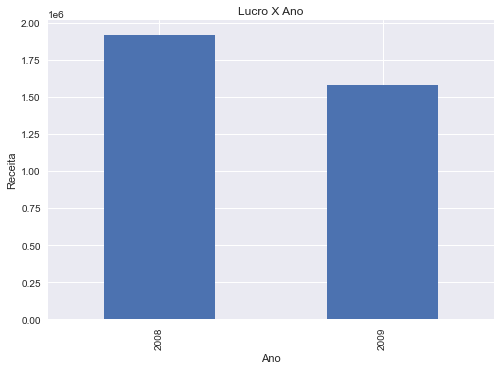

In [36]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title = "Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [38]:
#Selecionando apenas vendas de 2009
df2009 = df[df["Data Venda"].dt.year==2009]
df2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempoEnvio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


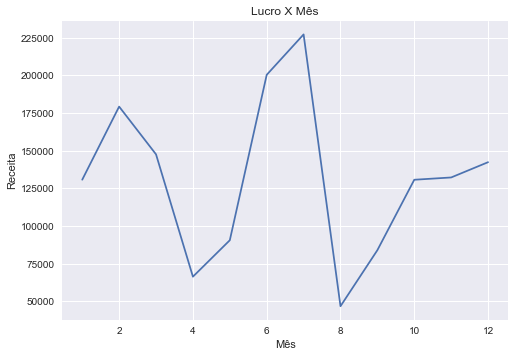

In [41]:
df2009.groupby(df2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro X Mês")
plt.xlabel("Mês")
plt.ylabel("Receita");

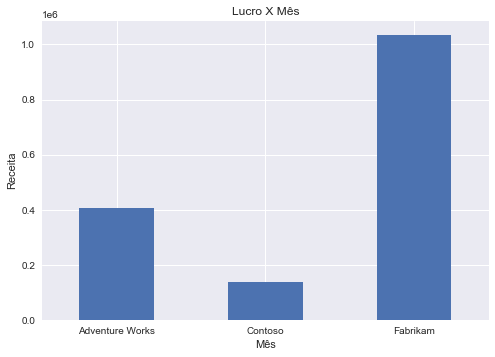

In [42]:
#xticks: Descrição das colunas vem na horizontal
df2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro X Mês")
plt.xlabel("Mês")
plt.ylabel("Receita")
plt.xticks(rotation='horizontal');

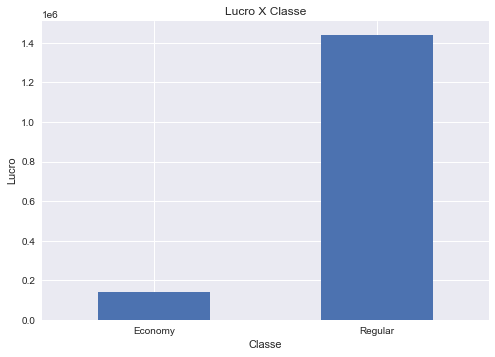

In [44]:
#Lucro por classe
df2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro X Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [45]:
df["tempoEnvio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempoEnvio, dtype: float64

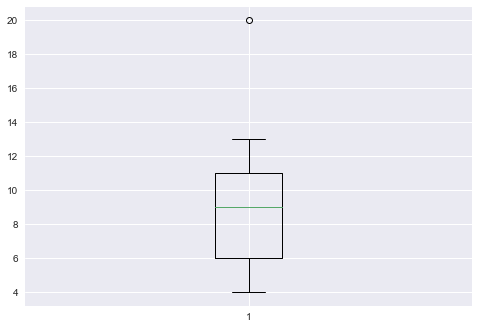

In [48]:
#Gráfico de boxplot
plt.boxplot(df["tempoEnvio"]);

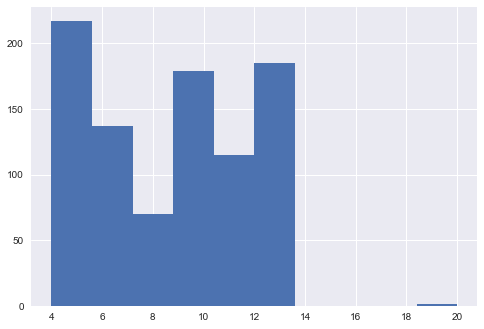

In [49]:
#Histograma (mostra o 20outlier)
plt.hist(df["tempoEnvio"]);

In [55]:
#Identificando o outlier
df[df["tempoEnvio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempoEnvio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [56]:
#Tempo máximo de envio
df["tempoEnvio"].max()

20

In [58]:
#Para salvar em csv (index = False não levará o index junto)
df.to_csv("df_vendas_novo1.csv", index=False)